In [ ]:
Executive Summary

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Predictive Analyst Case Study data set v1.xlsx')

In [3]:
data.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
0,2017-01-01,Desktop,Home,1106,147,33,1110
1,2017-01-02,Desktop,Home,1214,181,37,1110
2,2017-01-03,Desktop,Home,1265,189,39,1131
3,2017-01-04,Desktop,Home,1232,185,38,1064
4,2017-01-05,Desktop,Home,1254,188,37,1170


In [4]:
data.shape

(236, 7)

In [ ]:
## change date to datetime form and set this as index

In [6]:
data['date'] = data.date.apply(pd.to_datetime)

In [7]:
data.set_index('date',inplace=True)

In [8]:
data.head()

,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
date,,,,,,
2017-01-01,Desktop,Home,1106,147,33,1110
2017-01-02,Desktop,Home,1214,181,37,1110
2017-01-03,Desktop,Home,1265,189,39,1131
2017-01-04,Desktop,Home,1232,185,38,1064
2017-01-05,Desktop,Home,1254,188,37,1170


In [ ]:
# some dataframe column name has some space, so check the real column name

In [20]:
data.columns

Index(['device ', 'landing_page', 'landing_pageviews', 'checkout_pageviews',
       'thankyou_pageviews ', 'revenue '],
      dtype='object')

In [28]:
data['device '].value_counts()

Desktop     118
Mobile      118
Name: device , dtype: int64

In [29]:
data['landing_page'].value_counts()

Home        118
Product     118
Name: landing_page, dtype: int64

In [30]:
data['device '].value_counts().index

Index(['Desktop ', 'Mobile '], dtype='object')

In [10]:
len(data.index)

236

Divide into 4 categories:

1. desktop--home
2. desktop--product
3. Mobile--home
4. Mobile--product

## Compare revenue of desktop--home and desktop--product device

In [13]:
Desktop = data[data['device ']=='Desktop ']
Mobile = data[data['device ']=='Mobile ']

Text(0.5, 1.0, 'Desktop-Product Revenue')

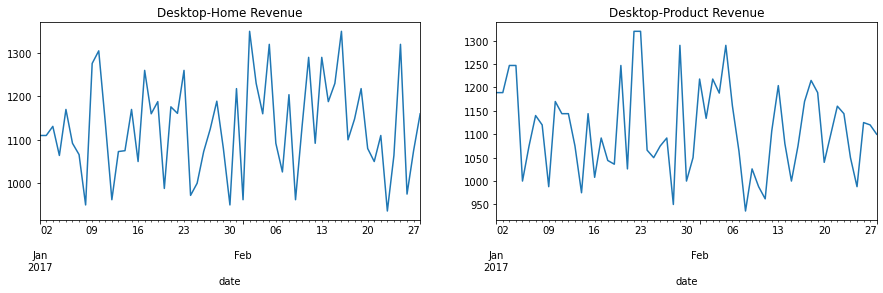

In [44]:
plt.subplot(2,2,1)
Desktop[Desktop['landing_page']=='Home']['revenue '].plot(figsize=(15,8))
plt.title('Desktop-Home Revenue')
plt.subplot(2,2,2)
Desktop[Desktop['landing_page']=='Product ']['revenue '].plot()
plt.title('Desktop-Product Revenue')

## Compare revenue of Mobile--home and Mobile--product device

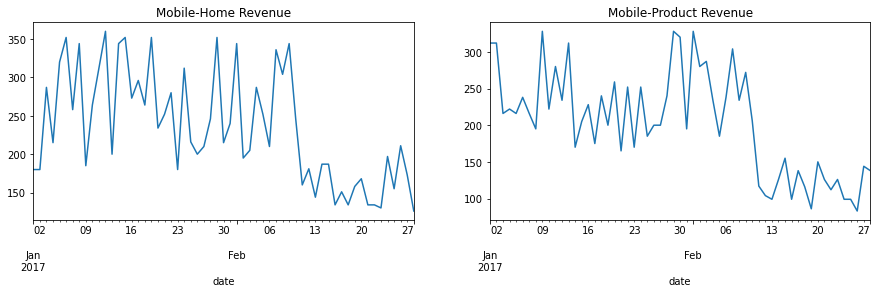

In [43]:
plt.subplot(2,2,1)
Mobile[Mobile['landing_page']=='Home']['revenue '].plot(figsize=(15,8))
plt.title('Mobile-Home Revenue')
plt.subplot(2,2,2)
Mobile[Mobile['landing_page']=='Product ']['revenue '].plot()
plt.title('Mobile-Product Revenue');

## Calculate various conversion rate of 4 categories

Desktop--Home & Desktop--product * Mobile--Home & Mobile--Product

funnel: landing_pageviews -> checkout_pageviews -> thank you_pagviews

In [33]:
data['checkout_pageview_rate'] = data['checkout_pageviews']/data['landing_pageviews']
data['thankyou_rate'] = data['thankyou_pageviews ']/data['checkout_pageviews']

In [51]:
Desktop.shape

(118, 8)

In [52]:
Desktop = data[data['device ']=='Desktop ']
Desktop_h = Desktop[Desktop['landing_page']=='Home']
Desktop_p = Desktop[Desktop['landing_page']=='Product ']
Mobile = data[data['device ']=='Mobile ']
Mobile_h = Mobile[Mobile['landing_page']=='Home']
Mobile_p = Mobile[Mobile['landing_page']=='Product ']

In [34]:
data.head()

,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue,checkout_pageview_rate,thankyou_rate
date,,,,,,,,
2017-01-01,Desktop,Home,1106,147,33,1110,0.132911,0.224490
2017-01-02,Desktop,Home,1214,181,37,1110,0.149094,0.204420
2017-01-03,Desktop,Home,1265,189,39,1131,0.149407,0.206349
2017-01-04,Desktop,Home,1232,185,38,1064,0.150162,0.205405
2017-01-05,Desktop,Home,1254,188,37,1170,0.149920,0.196809


In [35]:
data.landing_page.value_counts().index

Index(['Home', 'Product '], dtype='object')

## Compare landing pageviews

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/yiminghuang/Documen

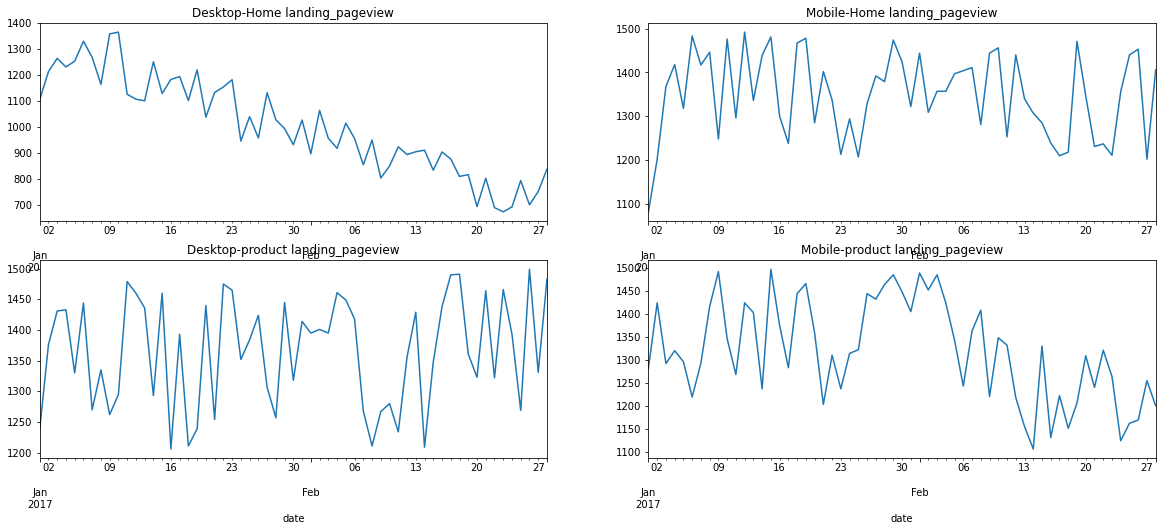

In [58]:
plt.subplot(2,2,1)
Desktop_h['landing_pageviews'].plot(figsize=(20,8))
plt.title('Desktop-Home landing_pageview')
plt.subplot(2,2,2)
Mobile_h['landing_pageviews'].plot()
plt.title('Mobile-Home landing_pageview')
plt.subplot(2,2,3)
Desktop_p['landing_pageviews'].plot()
plt.title('Desktop-product landing_pageview')
plt.subplot(2,2,4)
Mobile_p['landing_pageviews'].plot()
plt.title('Mobile-product landing_pageview');

## Compare checkout pageviews

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/yiminghuang/Documen

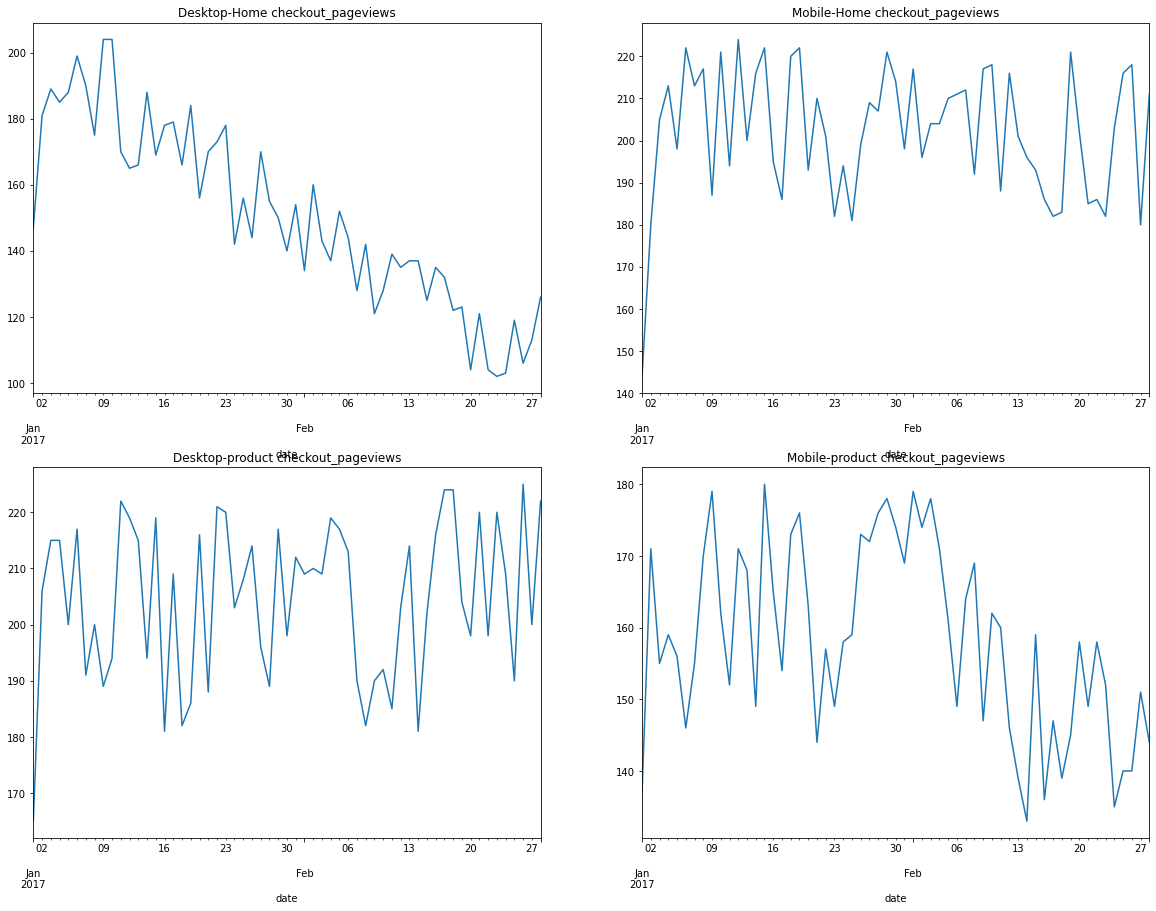

In [60]:
plt.subplot(2,2,1)
Desktop_h['checkout_pageviews'].plot(figsize=(20,15))
plt.title('Desktop-Home checkout_pageviews')
plt.subplot(2,2,2)
Mobile_h['checkout_pageviews'].plot()
plt.title('Mobile-Home checkout_pageviews')
plt.subplot(2,2,3)
Desktop_p['checkout_pageviews'].plot()
plt.title('Desktop-product checkout_pageviews')
plt.subplot(2,2,4)
Mobile_p['checkout_pageviews'].plot()
plt.title('Mobile-product checkout_pageviews');

## Compare thankyou_pageviews

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/yiminghuang/Documen

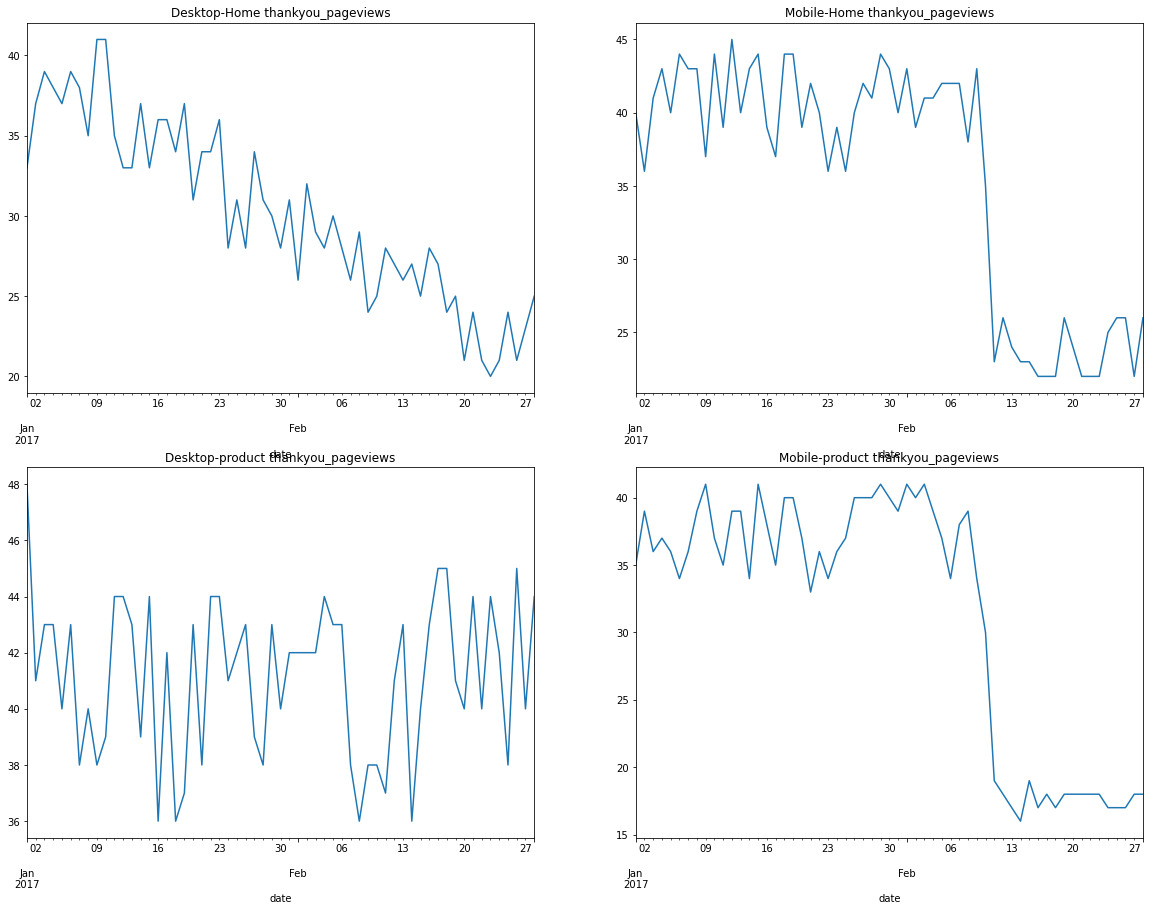

In [62]:
plt.subplot(2,2,1)
Desktop_h['thankyou_pageviews '].plot(figsize=(20,15))
plt.title('Desktop-Home thankyou_pageviews')
plt.subplot(2,2,2)
Mobile_h['thankyou_pageviews '].plot()
plt.title('Mobile-Home thankyou_pageviews')
plt.subplot(2,2,3)
Desktop_p['thankyou_pageviews '].plot()
plt.title('Desktop-product thankyou_pageviews')
plt.subplot(2,2,4)
Mobile_p['thankyou_pageviews '].plot()
plt.title('Mobile-product thankyou_pageviews');

## Compare checkout conversion rate 

Desktop -- Home & Product

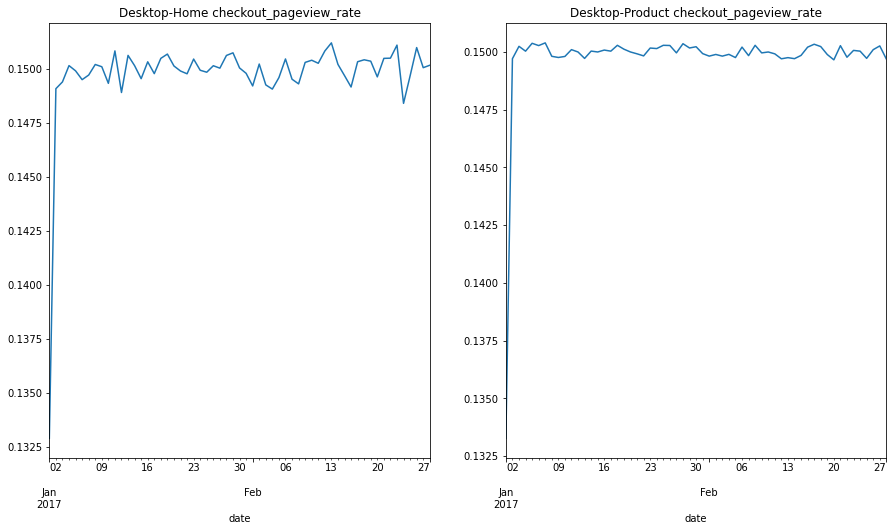

In [45]:
plt.subplot(1,2,1)
Desktop[Desktop['landing_page']=='Home']['checkout_pageview_rate'].plot(figsize=(15,8))
plt.title('Desktop-Home checkout_pageview_rate')
plt.subplot(1,2,2)
Desktop[Desktop['landing_page']=='Product ']['checkout_pageview_rate'].plot()
plt.title('Desktop-Product checkout_pageview_rate');

Mobile -- Home & Product

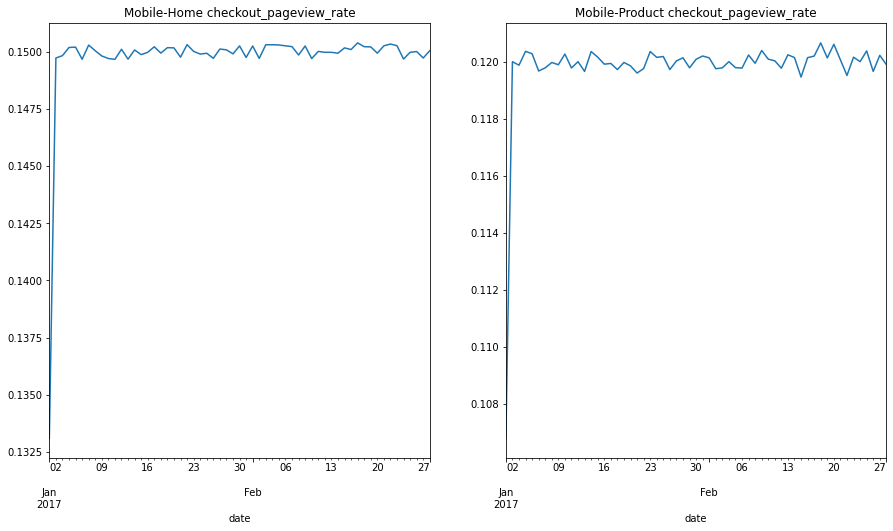

In [46]:
plt.subplot(1,2,1)
Mobile[Mobile['landing_page']=='Home']['checkout_pageview_rate'].plot(figsize=(15,8))
plt.title('Mobile-Home checkout_pageview_rate')
plt.subplot(1,2,2)
Mobile[Mobile['landing_page']=='Product ']['checkout_pageview_rate'].plot()
plt.title('Mobile-Product checkout_pageview_rate');

## Compare thankyou conversion rate 

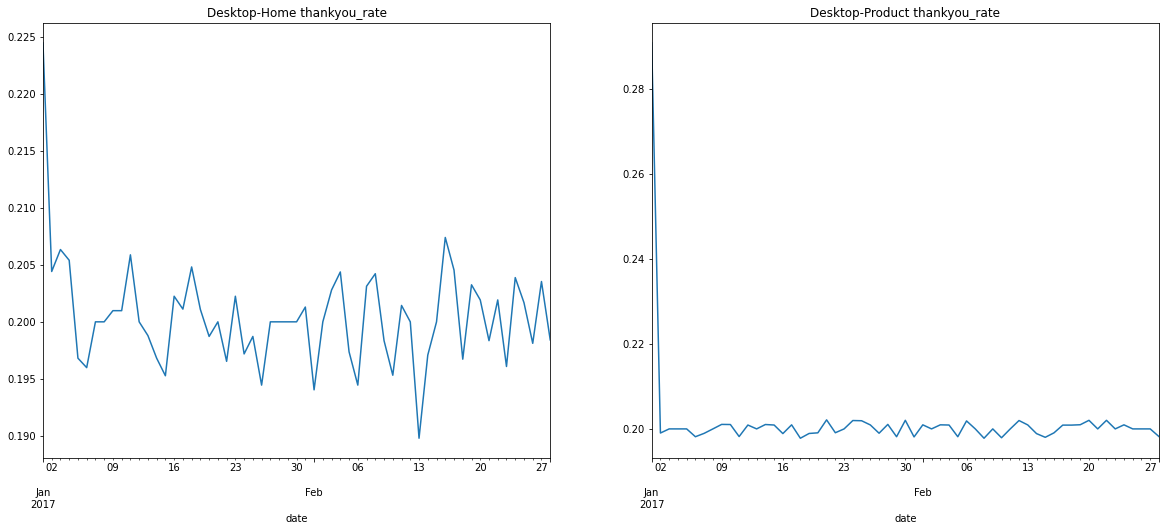

In [49]:
plt.subplot(1,2,1)
Desktop[Desktop['landing_page']=='Home']['thankyou_rate'].plot(figsize=(20,8))
plt.title('Desktop-Home thankyou_rate')
plt.subplot(1,2,2)
Desktop[Desktop['landing_page']=='Product ']['thankyou_rate'].plot()
plt.title('Desktop-Product thankyou_rate');

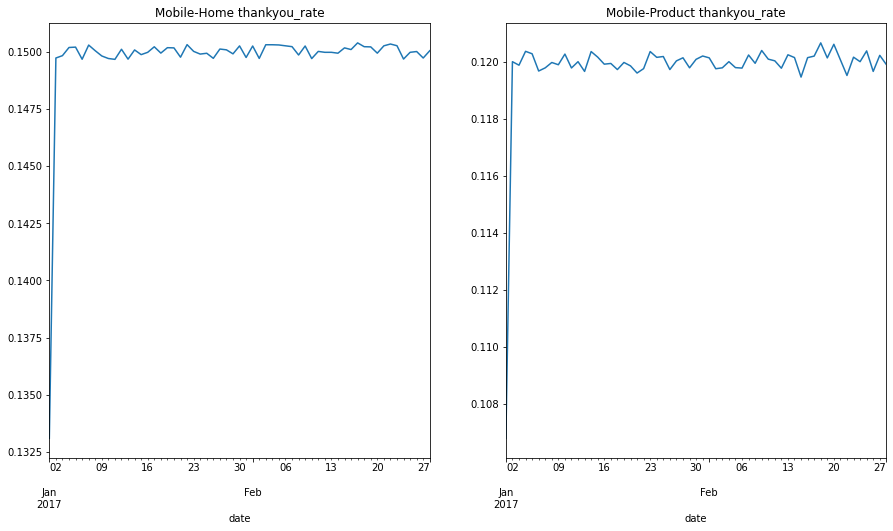

In [50]:
plt.subplot(1,2,1)
Mobile[Mobile['landing_page']=='Home']['checkout_pageview_rate'].plot(figsize=(15,8))
plt.title('Mobile-Home thankyou_rate')
plt.subplot(1,2,2)
Mobile[Mobile['landing_page']=='Product ']['checkout_pageview_rate'].plot()
plt.title('Mobile-Product thankyou_rate');

## ARIMA MODEL (TIME SERIES)

<ul>Visualize the Time Series Data</ul>
<ul>Make the time series data stationary</ul>
<ul>Plot the Correlation and AutoCorrelation Charts</ul>
<ul>Construct the ARIMA model</ul>
<ul>Use the model to make predictions</ul>


In [72]:
import statsmodels.api as sm

In [99]:
Desk_H_t = pd.DataFrame(Desktop_h['revenue '])
Desk_p_t = pd.DataFrame(Desktop_p['revenue '])
Mobile_H_t = pd.DataFrame(Mobile_h['revenue '])
Mobile_p_t = pd.DataFrame(Mobile_p['revenue '])

In [102]:
print('Desktop Home')
print(Desk_H_t.describe().transpose())
print('Desktop Product')
print(Desk_p_t.describe().transpose())
print('Mobile Home')
print(Mobile_H_t.describe().transpose())
print('Mobile Product')
print(Mobile_p_t.describe().transpose())

Desktop Home
          count         mean         std    min     25%     50%     75%  \
revenue    59.0  1129.779661  109.867015  936.0  1065.0  1125.0  1196.5   

             max  
revenue   1350.0  
Desktop Product
          count         mean        std    min     25%     50%     75%     max
revenue    59.0  1111.271186  95.929901  936.0  1042.0  1100.0  1179.0  1320.0
Mobile Home
          count        mean        std    min    25%    50%    75%    max
revenue    59.0  234.949153  72.089366  126.0  180.0  215.0  291.5  360.0
Mobile Product
          count        mean        std   min    25%    50%    75%    max
revenue    59.0  202.915254  71.002498  83.0  141.0  205.0  246.0  328.0


1.Visualize time series data

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/yiminghuang/Documen

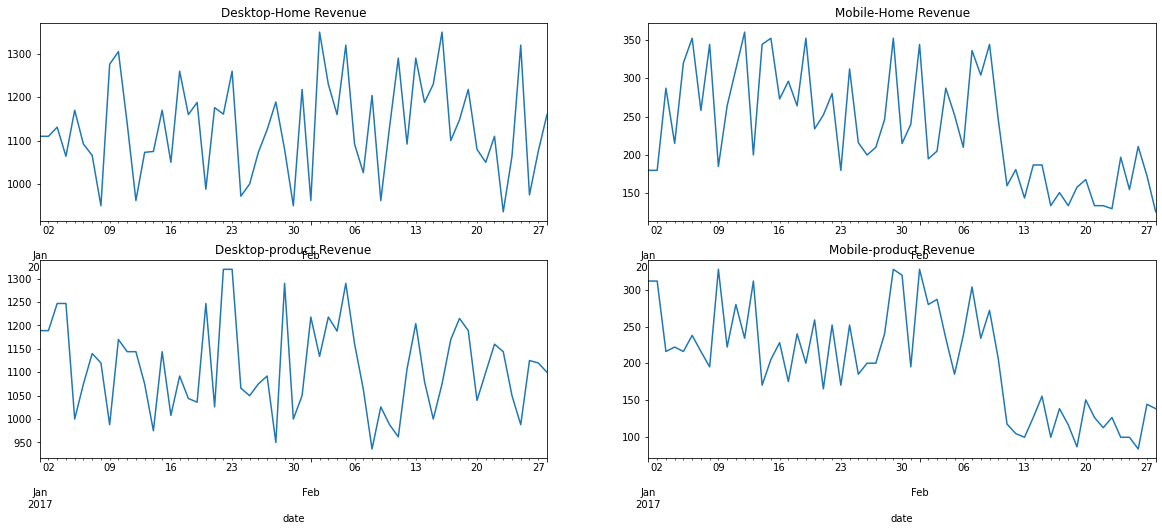

In [103]:
plt.subplot(2,2,1)
Desk_H_t['revenue '].plot(figsize=(20,8))
plt.title('Desktop-Home Revenue')
plt.subplot(2,2,2)
Mobile_H_t['revenue '].plot()
plt.title('Mobile-Home Revenue')
plt.subplot(2,2,3)
Desk_p_t['revenue '].plot()
plt.title('Desktop-product Revenue')
plt.subplot(2,2,4)
Mobile_p_t['revenue '].plot()
plt.title('Mobile-product Revenue');

2.Make data stationary

In [104]:
from statsmodels.tsa.stattools import adfuller

In [105]:
def adf_check(time_series):
    result = adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags', 'Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : " + str(value))
    
    if result[1] <=0.05:
        print('Strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root and is non-stationary')

In [106]:
adf_check(Desk_H_t['revenue '])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -3.5636217277384756
p-value : 0.006495821367977014
# of lags : 6
Num of Observations used : 52
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [107]:
adf_check(Desk_p_t['revenue '])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -6.477552001635249
p-value : 1.3195760560547122e-08
# of lags : 0
Num of Observations used : 58
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [108]:
adf_check(Mobile_H_t['revenue '])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -1.5955454716868085
p-value : 0.4858307682557088
# of lags : 2
Num of Observations used : 56
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [109]:
adf_check(Mobile_p_t['revenue '])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -2.280992515000202
p-value : 0.17817155934811235
# of lags : 1
Num of Observations used : 57
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [118]:
Mobile_H_t['First Difference'] = Mobile_H_t['revenue '] - Mobile_H_t['revenue '].shift(1)

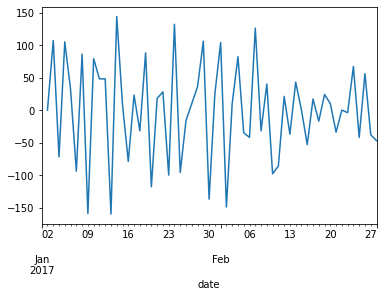

In [119]:
Mobile_H_t['First Difference'].plot()

In [120]:
adf_check(Mobile_H_t['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -9.670206559748586
p-value : 1.2829311419532972e-16
# of lags : 1
Num of Observations used : 56
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


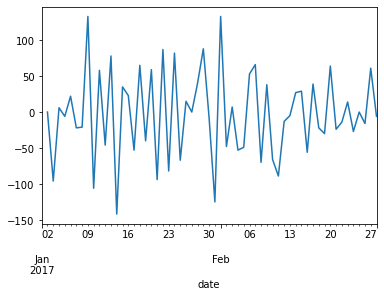

In [121]:
Mobile_p_t['First Difference'] = Mobile_p_t['revenue '] - Mobile_p_t['revenue '].shift(1)
Mobile_p_t['First Difference'].plot()

In [122]:
adf_check(Mobile_p_t['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -13.75393457055528
p-value : 1.0380898719816897e-25
# of lags : 0
Num of Observations used : 57
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


3. Plot the Correlation and AutoCorrelation Charts

In [124]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

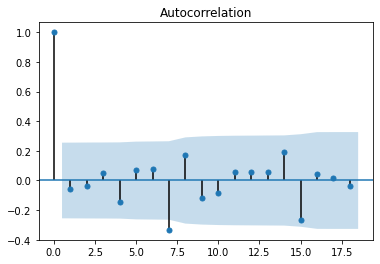

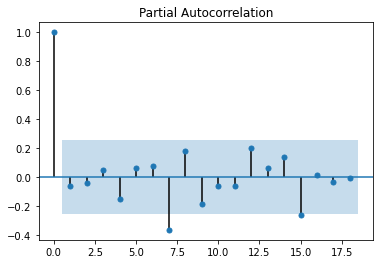

In [143]:
fig = plot_acf(Desk_H_t['revenue '])
fig__ = plot_pacf(Desk_H_t['revenue '])

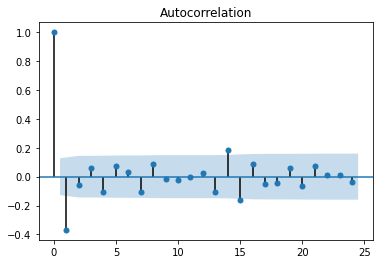

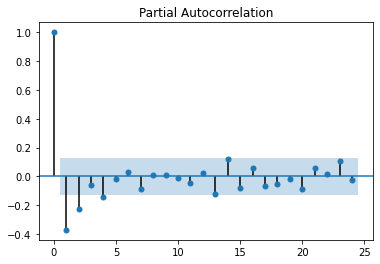

In [98]:
fig = plot_acf(Series['First Difference'].dropna())
fig__ = plot_pacf(Series['First Difference'].dropna())


In [144]:
from pandas.plotting import autocorrelation_plot

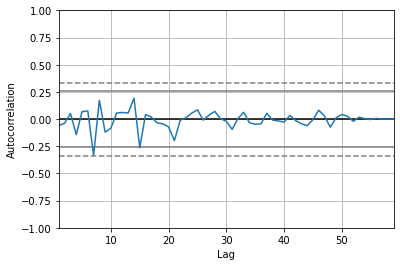

In [145]:
autocorrelation_plot(Desk_H_t['revenue '].dropna())


4. Construct the ARIMA model

In [113]:
from statsmodels.tsa.arima_model import ARIMA

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               revenue    No. Observations:                   59
Model:                     ARMA(1, 0)   Log Likelihood                -360.365
Method:                       css-mle   S.D. of innovations            108.735
Date:                Sun, 19 Jul 2020   AIC                            726.730
Time:                        17:21:55   BIC                            732.963
Sample:                    01-01-2017   HQIC                           729.163
                         - 02-28-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1129.7699     13.378     84.447      0.000    1103.549    1155.991
ar.L1.revenue     -0.0591      0.129     -0.458      0.647      -0.312       0.194
                                    

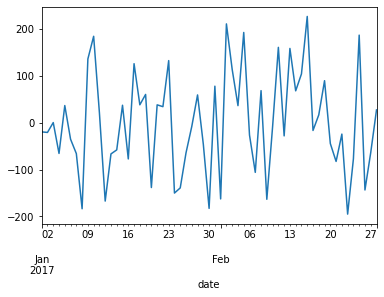

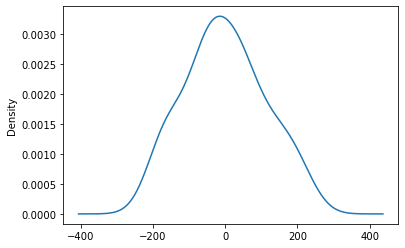

In [273]:
model = ARIMA(Desk_H_t['revenue '],order=(1,0,0))
results = model.fit(disp=0)
print(results.summary())
results.resid.plot()
plt.show()
results.resid.plot(kind='kde')
plt.show()

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                            revenue    No. Observations:                   59
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 7)   Log Likelihood                -334.080
Date:                             Sun, 19 Jul 2020   AIC                            674.160
Time:                                     14:47:49   BIC                            679.956
Sample:                                 01-01-2017   HQIC                           676.375
                                      - 02-28-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.5429      0.185     -2.931      0.003      -0.906      -0.180
ma.S.L7       -0.6798      

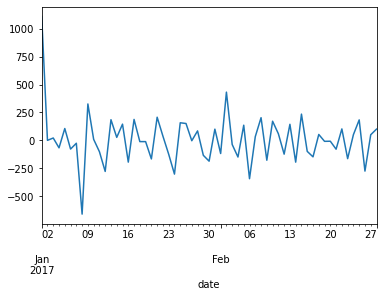

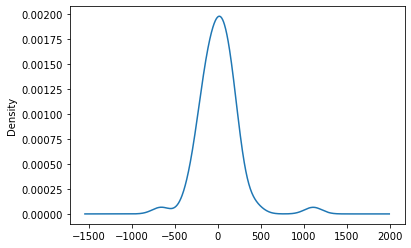

In [245]:
model = sm.tsa.statespace.SARIMAX(Desk_H_t['revenue '],order=(0,1,0),seasonal_order=(1,1,1,7))
results = model.fit()
print(results.summary())
results.resid.plot()
plt.show()
results.resid.plot(kind='kde')
plt.show()

In [262]:
Desk_p_t['revenue '][-15:]

date
2017-02-14    1080
2017-02-15    1000
2017-02-16    1075
2017-02-17    1170
2017-02-18    1215
2017-02-19    1189
2017-02-20    1040
2017-02-21    1100
2017-02-22    1160
2017-02-23    1144
2017-02-24    1050
2017-02-25     988
2017-02-26    1125
2017-02-27    1120
2017-02-28    1100
Name: revenue , dtype: int64

In [263]:
model2 = sm.tsa.statespace.SARIMAX(Desk_p_t['revenue '][-15:],order=(0,1,0),seasonal_order=(1,1,1,7))
model3 = sm.tsa.statespace.SARIMAX(Mobile_H_t['revenue '][-15:],order=(0,1,0),seasonal_order=(1,1,1,7))
model4 = sm.tsa.statespace.SARIMAX(Mobile_p_t['revenue '][-15:],order=(0,1,0),seasonal_order=(1,1,1,7))
result2 = model2.fit()
result3 = model3.fit()
result4 = model4.fit()

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarni

In [ ]:
pd.DataFrame

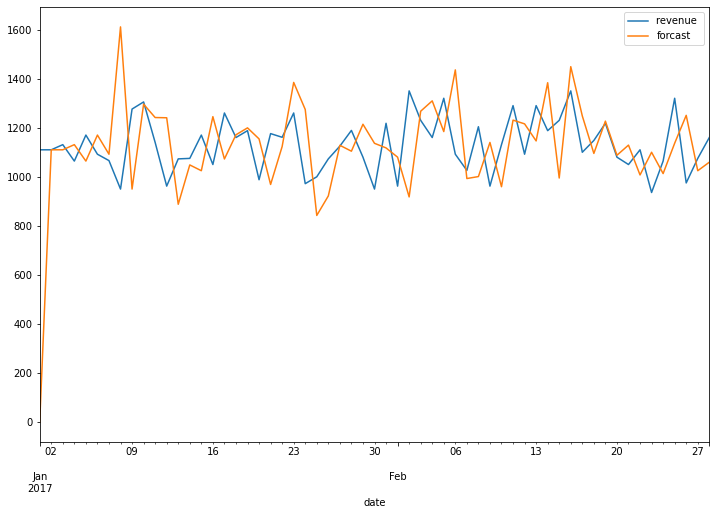

In [247]:
Desk_H_t['forcast'] = results.predict(start=0,end=59)
Desk_H_t[['revenue ','forcast']].plot(figsize=(12,8))

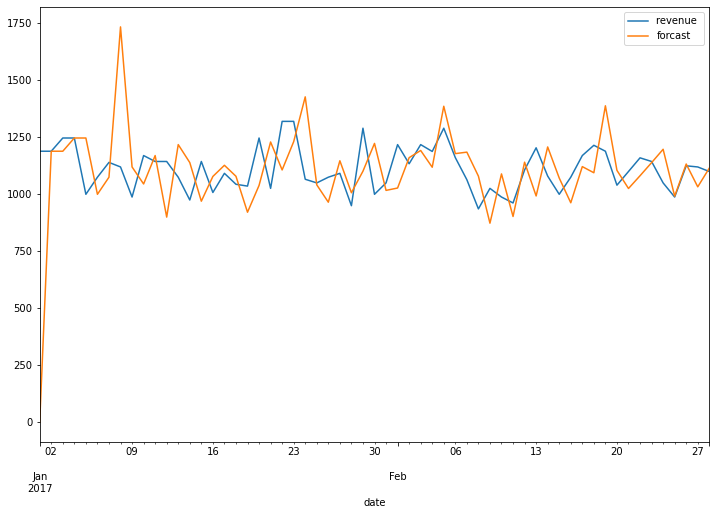

In [248]:
Desk_p_t['forcast'] = result2.predict(start=0,end=59)
Desk_p_t[['revenue ','forcast']].plot(figsize=(12,8))

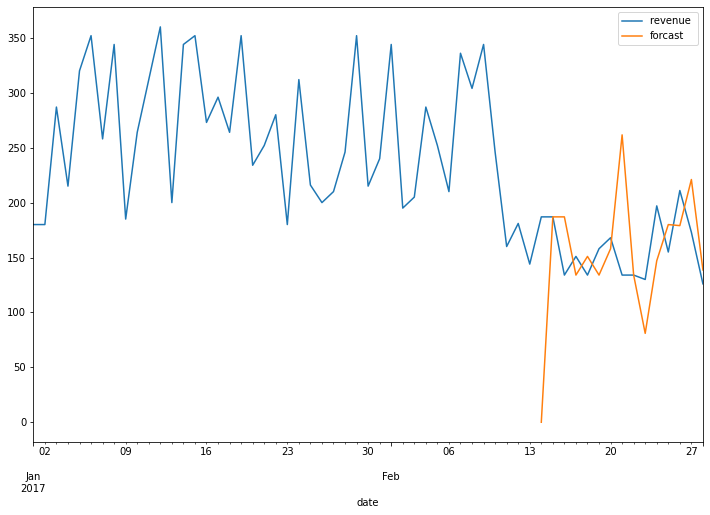

In [264]:
Mobile_H_t['forcast'] = result3.predict(start=0,end=59)
Mobile_H_t[['revenue ','forcast']].plot(figsize=(12,8))

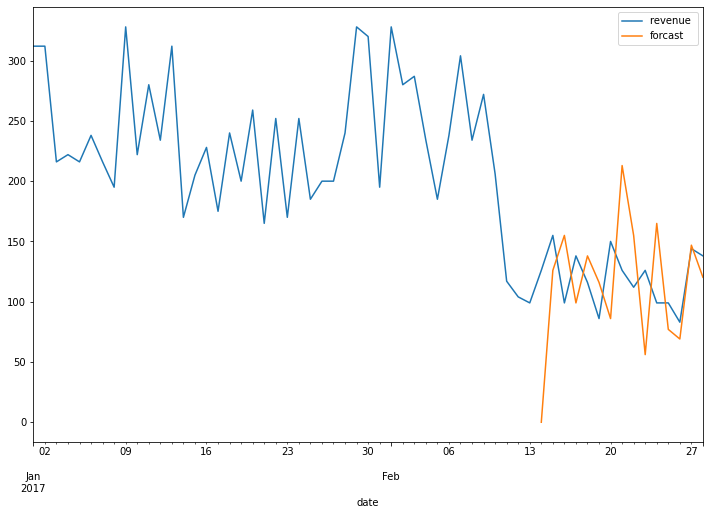

In [265]:
Mobile_p_t['forcast'] = result4.predict(start=0,end=59)
Mobile_p_t[['revenue ','forcast']].plot(figsize=(12,8))

5. Use the model to make predictions

In [159]:
from pandas.tseries.offsets import DateOffset

In [173]:
March = [Desk_H_t.index[-1] + DateOffset(days=x) for x in range(0,32)]
final_Desk_H_t = pd.concat([Desk_H_t,pd.DataFrame(index=March[1:],columns=Desk_H_t.columns)])
final_Desk_p_t = pd.concat([Desk_p_t,pd.DataFrame(index=March[1:],columns=Desk_p_t.columns)])
final_Mobile_H_t = pd.concat([Mobile_H_t,pd.DataFrame(index=March[1:],columns=Mobile_H_t.columns)])
final_Mobile_p_t = pd.concat([Mobile_p_t,pd.DataFrame(index=March[1:],columns=Mobile_p_t.columns)])

In [266]:
final_Desk_H_t['forcast'] = results.predict(start=0, end=90)

In [267]:
final_Desk_p_t['forcast'] = result2.predict(start=0, end=90)

In [268]:
final_Mobile_H_t['forcast'] = result3.predict(start=0, end=90)

In [269]:
final_Mobile_p_t['forcast'] = result4.predict(start=0, end=90)

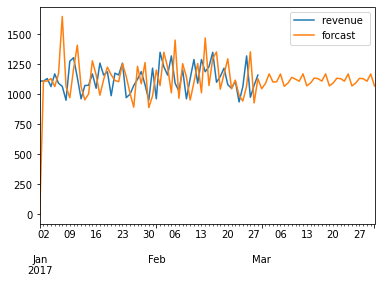

In [251]:
final_Desk_H_t[['revenue ','forcast']].plot()

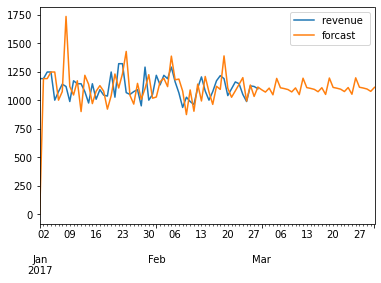

In [253]:
final_Desk_p_t[['revenue ','forcast']].plot()

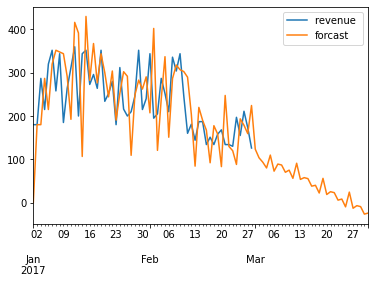

In [256]:
final_Mobile_H_t[['revenue ','forcast']].plot()

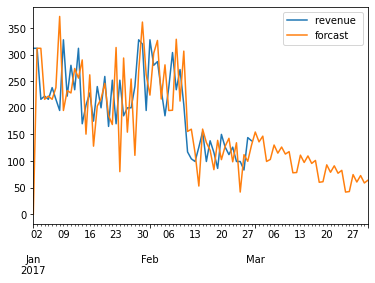

In [257]:
final_Mobile_p_t[['revenue ','forcast']].plot()

In [258]:
final = final_Desk_H_t + final_Desk_p_t + final_Mobile_H_t + final_Mobile_p_t

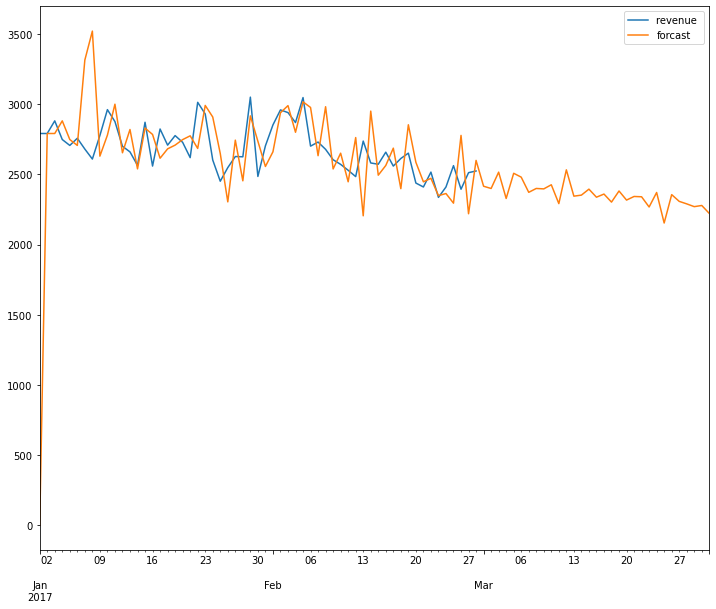

In [260]:
final[['revenue ','forcast']].plot(figsize=(12,10))